In [3]:
from czibench.datasets.sc import SingleCellDataset
from czibench.datasets.types import Organism
from czibench.runner import ContainerRunner
from czibench.tasks.sc import ClusteringTask, EmbeddingTask

dataset = SingleCellDataset(
    "example.h5ad",
    organism=Organism.HUMAN,
)

runner = ContainerRunner(
    image="czibench-scgpt:latest",
    gpu=True,
)
dataset = runner.run(dataset)

task = ClusteringTask(label_key="cell_type")
dataset, clustering_results = task.run(dataset)

task = EmbeddingTask(label_key="cell_type")
dataset, embedding_results = task.run(dataset)

In [4]:
clustering_results

{'adjusted_rand_index': 0.5306898544844713,
 'normalized_mutual_info': np.float64(0.7004442496672905)}

In [5]:
embedding_results

{'silhouette_score': np.float32(0.069857776)}

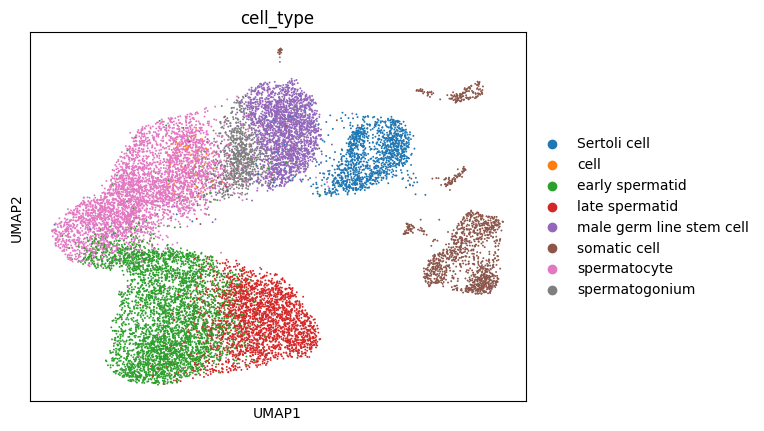

In [6]:
import scanpy as sc
sc.tl.umap(dataset.adata)
sc.pl.umap(dataset.adata, color="cell_type")